<a href="https://colab.research.google.com/github/daniruro19/Python/blob/main/redNeuronaL_ruizDaniel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np

In [21]:
class NetNode(object):
  def __init__(self):
    self.inputs = []
    self.weights = []
    self.value = None

In [22]:
#CLASE NETWORK SIN MODIFICAR

class Network(object):
  def __init__(self,layers):
    self.net=[[NetNode() for i in range(size)] for size in layers]

    sizes = len(layers)

    for layer in range(1,sizes):
      for node in self.net[layer]:
        for unit in self.net[layer - 1]:
          node.inputs.append(unit)
          node.weights.append(0)

  def relu(self,z):
    return max(0,z)

  def relu_prime(self,z):
    return 1 if z > 0 else 0

  def sigmoid(self, z):
    return 1 / (1 + np.exp(-z))

  def sigmoid_prime(self, z):
    return self.sigmoid(z) * (1 - self.sigmoid(z))


  def backpropagation(self,eta,examples,epochs):
    inputs=self.net[0]
    outputs=self.net[-1]
    layer_size=len(self.net)

    for layer in self.net[1:]:
      for node in layer:
        node.weights = [np.random.uniform() for i in range(len(node.weights))] 

    for epoch in range(epochs):
      for x_train, y_train in examples:
        for value, node in zip(x_train, inputs):
          node.value=value

        for layer in self.net[1:]:
          for node in layer:
            in_val=[n.value for n in node.inputs]
            unit_value = np.dot(in_val, node.weights)
            node.value = self.relu(unit_value)

    delta = [[] for _ in range(layer_size)]
    
    err=[y_train[i] - outputs[i].value for i in range(len(outputs))]

    delta[-1]=[self.relu_prime(outputs[i].value) * err[i] for i in range(len(outputs))]

    hidden_layers = layer_size - 2
    for i in range(hidden_layers, 0, -1):
      layers = self.net[i]
      n_layers = len(layer)

      w = [[node.weights[l] for node in self.net[i + 1]] for l in range(n_layers)]

      delta[i]=[self.relu_prime(layer[j].value) * np.dot(w[j], delta[i + 1]) for j in range(n_layers)]

      hidden_layers = layer_size - 2
      for i in range(hidden_layers, 0, -1):
        layer = self.net[i]
        n_layers = len(layer)

        w = [[node.weights[l] for node in self.net[i+1]] for l in range(n_layers)]

        delta[i]=[self.relu_prime(layer[j].value) * np.dot(w[j], delta[i+1]) for j in range(n_layers)]

        for i in range(1, layer_size):
          layer = self.net[i]
          in_val = [node.value for node in self.net[i-1]]
          n_layers = len(layer)
          for j in range(n_layers):
            layer[j].weights = np.add(layer[j].weights, np.multiply(eta * delta[i][j], in_val))

  def predict(self, input_data):
    inputs = self.net[0]

    for v, n in zip(input_data, inputs):
      n.value=v

    for layer in self.net[1:]:
      for node in layer:
        in_val = [n.value for n in node.inputs]
        unit_value = np.dot(in_val, node.weights)
        node.value = self.relu(unit_value)

    outputs = self.net[-1]
    return outputs.index(max(outputs, key=lambda node: node.value))

  def accuracy(self, examples):
    correct = 0

    for x_test, y_test in examples:
      prediction = self.predict(x_test)

      if(y_test[prediction] == 1):
        correct += 1

    return correct / len(examples)

In [23]:
#CLASE NETWORK MODIFICADA

class Network1(object):
  def __init__(self,layers):
    self.net=[[NetNode() for i in range(size)] for size in layers]

    sizes = len(layers)

    for layer in range(1,sizes):
      for node in self.net[layer]:
        for unit in self.net[layer - 1]:
          node.inputs.append(unit)
          node.weights.append(0)

  def relu(self,z):
    return max(0,z)

  def relu_prime(self,z):
    return 1 if z > 0 else 0

  def sigmoide(self, z):
    return 1.0 / (1.0 + np.exp(-z))

  def sigmoide_prime(self, z):
    return self.sigmoide(z) * (1 - self.sigmoide(z))

  def activate(self, z):
    if self.activation == 'relu':
        return max(0, z)
    elif self.activation == 'sigmoid':
        return 1 / (1 + np.exp(-z))
    else:
       raise ValueError('funcion de activacion no concretada')    


  def backpropagation2(self, x, y):
      z_list = []
      a_list = [x]
      for i in range(self.num_layers):
          z = np.dot(self.weights[i], a_list[-1]) + self.biases[i]
          if self.activation_func == 'relu':
              a = self.relu(z)
          else:
              a = self.sigmoide(z)
          z_list.append(z)
          a_list.append(a)
      
      delta = (a_list[-1] - y) * self.sigmoide_prime(z_list[-1])
      nabla_b = [delta]
      nabla_w = [np.dot(delta, a_list[-2].T)]
      for l in range(2, self.num_layers+1):
          z = z_list[-l]
          if self.activation_func == 'relu':
              sp = self.relu_prime(z)
          else:
              sp = self.sigmoide_prime(z)
          delta = np.dot(self.weights[-l+1].T, delta) * sp
          nabla_b.insert(0, delta)
          nabla_w.insert(0, np.dot(delta, a_list[-l-1].T))
      
      self.weights = [w-(self.learning_rate/n)*nw for w, nw in zip(self.weights, nabla_w)]
      self.biases = [b-(self.learning_rate/n)*nb for b, nb in zip(self.biases, nabla_b)]
      
      activations = np.asarray(a_list).T
      
      return activations  

  def predict2(self, input_data):
    inputs = self.net[0]

    for v, n in zip(input_data, inputs):
        n.value = v

    for layer in self.net[1:]:
        for node in layer:
            in_val = [n.value for n in node.inputs]
            unit_value = np.dot(in_val, node.weights)
            node.value = self.activation_function(unit_value)

    outputs = self.net[-1]
    return outputs[0].value


  def accuracy2(self, examples):
    error = 0.0

    for x_test, y_test in examples:
        prediction = self.predict(x_test)
        error += (prediction - y_test) ** 2

    return error / len(examples)

  def weights(self):
    weights = []
    for layer in self.net[1:]:
      layer_weights = []
      for node in layer:
        layer_weights.append(node.weights)
      weights.append(layer_weights)
    return weights

  def set_weights(self, weights):
    for i in range(1, len(self.net)):
        layer = self.net[i]
        for j in range(len(layer)):
            node = layer[j]
            node.weights = weights[i-1][j]


In [24]:
from sklearn import datasets
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

In [25]:
iris_X, iris_y = datasets.load_iris(return_X_y=True)

iris_X[:10]
iris_y[:10]

iris_x_normalized = normalize(iris_X, axis=0)

X_train, X_test, y_train, y_test = train_test_split(iris_x_normalized, iris_y, test_size=0.2, shuffle=True)

In [26]:
y_train = np_utils.to_categorical(y_train, num_classes=3)
y_test = np_utils.to_categorical(y_test, num_classes=3)

examples = []
for i in range(len(X_train)): examples.append([X_train[i], y_train[i]])

net = Network([4, 7, 3])

net.backpropagation(0.1, examples, 500)

prediction = net.predict(X_test[0])
accuracy = net.accuracy(examples)
print(f"Accuracy: {accuracy}")

print(f"Desired output: {y_test[0]}")
print(f"Index of output: {prediction}")

Accuracy: 0.30833333333333335
Desired output: [0. 1. 0.]
Index of output: 1


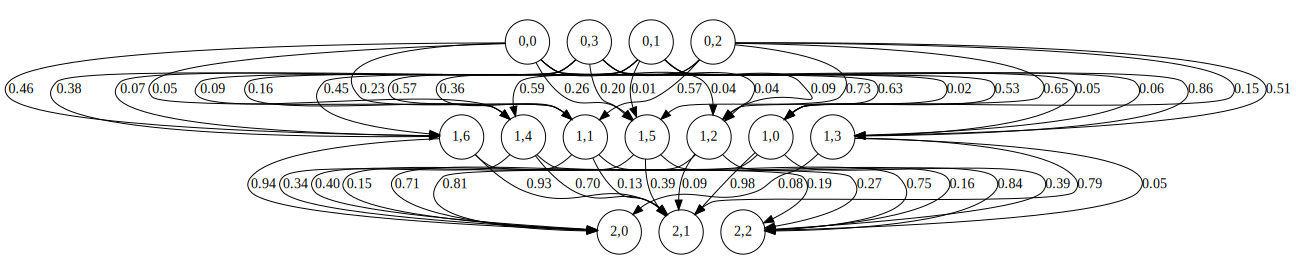

In [27]:
#VISUALIZACION GRÁFICA

import graphviz

def draw_graph(net):
    dot = graphviz.Digraph()
    dot.attr('node', shape='circle')
    for i, layer in enumerate(net.net):
        with dot.subgraph(name=f'cluster_{i}') as c:
            c.attr(style='invis')
            for j, node in enumerate(layer):
                c.node(f'{i},{j}')
    for i, layer in enumerate(net.net):
        for j, node in enumerate(layer):
            for input_node, weight in zip(node.inputs, node.weights):
                dot.edge(f'{i-1},{net.net[i-1].index(input_node)}', f'{i},{j}', label=f'{weight:.2f}')
    return dot
    
draw_graph(net)

In [ ]:
# agrega el método weigths() a la clase Network, de tal forma que permita obtener los pesos de las neuronas

  def weights(self):
    weights = []
    for layer in self.net[1:]:
      layer_weights = []
      for node in layer:
        layer_weights.append(node.weights)
      weights.append(layer_weights)
    return weights

# agrega el método set_weights() a la clase Network, de tal forma que permite definir los pesos de las neuronas
  def set_weights(self, weights):
    for i in range(1, len(self.net)):
        layer = self.net[i]
        for j in range(len(layer)):
            node = layer[j]
            node.weights = weights[i-1][j]

# agrega los métodos sigmoide() y sigmoide_prime() a la clase Network

  def sigmoide(self, z):
    return 1.0 / (1.0 + np.exp(-z))

  def sigmoide_prime(self, z):
    return self.sigmoide(z) * (1 - self.sigmoide(z))

# modifica la clase Network, para que se pueda decidir qué función de activación utilizar: relu() o sigmoide()

  def activate(self, z):
    if self.activation == 'relu':
        return max(0, z)
    elif self.activation == 'sigmoid':
        return 1 / (1 + np.exp(-z))
    else:
       raise ValueError('funcion de activacion no concretada')    

# los métodos predict() y accuracy() de la clase Network están implementados para resolver problemas de clasificación
# modifícalos de tal manera que también se puedan utilizar con problemas de regresión
  def predict2(self, input_data):
    inputs = self.net[0]

    for v, n in zip(input_data, inputs):
        n.value = v

    for layer in self.net[1:]:
        for node in layer:
            in_val = [n.value for n in node.inputs]
            unit_value = np.dot(in_val, node.weights)
            node.value = self.activation_function(unit_value)

    outputs = self.net[-1]
    return outputs[0].value

  def accuracy2(self, examples):
    error = 0.0

    for x_test, y_test in examples:
        prediction = self.predict(x_test)
        error += (prediction - y_test) ** 2

    return error / len(examples)

# modifica el método backpropagation() de tal manera que devuelva como resultado el array de valores de los nodos durante las épocas de entrenamiento
  def backpropagation2(self, x, y):
      z_list = []
      a_list = [x]
      for i in range(self.num_layers):
          z = np.dot(self.weights[i], a_list[-1]) + self.biases[i]
          if self.activation_func == 'relu':
              a = self.relu(z)
          else:
              a = self.sigmoide(z)
          z_list.append(z)
          a_list.append(a)
      
      delta = (a_list[-1] - y) * self.sigmoide_prime(z_list[-1])
      nabla_b = [delta]
      nabla_w = [np.dot(delta, a_list[-2].T)]
      for l in range(2, self.num_layers+1):
          z = z_list[-l]
          if self.activation_func == 'relu':
              sp = self.relu_prime(z)
          else:
              sp = self.sigmoide_prime(z)
          delta = np.dot(self.weights[-l+1].T, delta) * sp
          nabla_b.insert(0, delta)
          nabla_w.insert(0, np.dot(delta, a_list[-l-1].T))
      
      self.weights = [w-(self.learning_rate/n)*nw for w, nw in zip(self.weights, nabla_w)]
      self.biases = [b-(self.learning_rate/n)*nb for b, nb in zip(self.biases, nabla_b)]
      
      activations = np.asarray(a_list).T
      
      return activations     